#Group 31

You will be using the Pokémon dataset, which is given to you as part of this assignment
Distortion score (a.k.a inertia) definition: the sum of squared distances from each point to its assigned center
> **Q4** (choose the best number of k for k-means algorithm) (10 points)
1.  Using the elbow rule, plot the distortion score (a.k.a inertia) vs the 
number of clusters.
2. Determine the optimal number of clusters for k-means.

> **Q5** (choose the best number of neurons for SOM algorithm) (15 points + 10 bonus)
1. Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of neurons (max 30
neurons).
2. Determine the optimal number of neurons for SOM.

> **Bonus**
3. Use T-SNE method to visualize the SOM clusters, obtained from the previous step, on a 2D figure. Use
different color code for each cluster
4. Compare the results of the previous step with T-SNE before applying SOM on the Pokémon dataset.

> **Q6** (DBSCAN tuning) (25 points)
Tune the epsilon and minpoints to obtain 10 clusters.
- Plot the epsilon and minpoints values as x-y axes using a 3D figure to show the 10 combinations of
epsilon and minpoints that brings you closer to the 10 clusters. The z-axis should illustrate the
number of clusters you obtain when using the corresponding epsilon and minpoints.
- After determine the parameters for DBSCAN with 10 clusters, plot DBSCAN clusters.

> **Note**: If you cannot find the parameters to obtain 10 clusters, you can use the parameters of the closet
number to 10 clusters to plot the figure.

In [ ]:
!pip install sklearn-som

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn_som.som import SOM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns 


# Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [ ]:
df = pd.read_csv('Pokemon.csv')
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,type1
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,grass
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,grass
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,grass
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,fire
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,fire


In [ ]:
df['type1'] = df['type1'].astype('category')
y= df['type1'].cat.codes
X= df.drop('type1',axis=1)
rs=43

# Kmeans



1. Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of clusters.


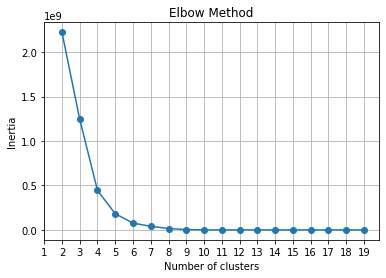

In [ ]:
score = []
for i in range(2,20):
  temp_model3 = KMeans(n_clusters=i, random_state=rs,n_jobs=-1)
  temp_model3.fit(X)
  pred_l = temp_model3.labels_
  score.append((temp_model3.inertia_,i))

df_score = pd.DataFrame(score, columns=['score','cluster'])
plt.plot(range(2,20), df_score['score'], marker = 'o')
plt.xticks(range(1,20))
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)

plt.show()

2. Determine the optimal number of clusters for k-means. 

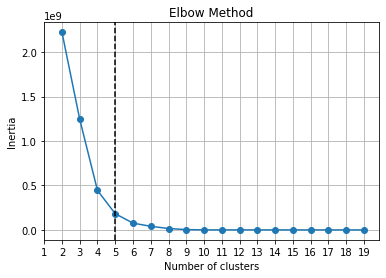

In [ ]:
plt.plot(range(2,20), df_score['score'], marker = 'o')
plt.xticks(range(1,20))
plt.axvline(x=5, linestyle='--',c='black')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)

plt.show()

# SOM


## Elbow

1. Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of neurons (max 30 
neurons).

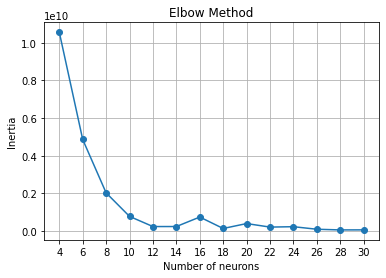

In [ ]:
np.random.seed(2)
score = []


for i in range(2,16):
  temp_model3 = SOM(m=i, n=2, dim=X.shape[1])
  labels = temp_model3.fit_predict(X.to_numpy())
  score.append((temp_model3.inertia_,i*2))


df_score = pd.DataFrame(score, columns=['score','neurons'])
plt.plot(df_score['neurons'], df_score['score'], marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of neurons")
plt.ylabel("Inertia")
plt.xticks([i*2 for i in range(2,16)])
plt.grid(True)

plt.show()

2. Determine the optimal number of neurons for SOM. 

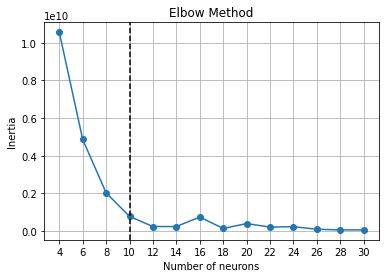

In [ ]:
plt.plot(df_score['neurons'], df_score['score'], marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of neurons")
plt.ylabel("Inertia")
plt.xticks([i*2 for i in range(2,16)])
plt.axvline(x=10, linestyle='--',c='black')
plt.grid(True)

plt.show()

## T-NSE

3. Use T-SNE method to visualize the SOM clusters, obtained from the previous step, on a 2D figure. Use 
different color code for each cluster

In [ ]:
from sklearn.manifold import TSNE   
X_embedded = TSNE(n_components=2 ,random_state=rs,n_jobs=-1).fit_transform(X)

In [106]:
som_model = SOM(m=5, n=2, dim=X.shape[1])
labels = som_model.fit_predict(X.to_numpy())

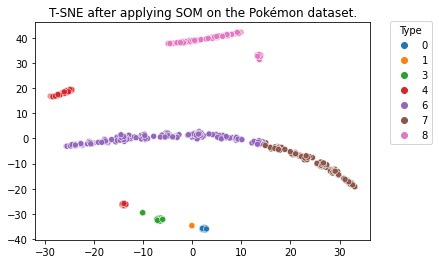

In [107]:
scatter = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],
                          hue=labels,palette="tab10")
scatter.legend(bbox_to_anchor= (1.2, 1.03), title="Type")
plt.title("T-SNE after applying SOM on the Pokémon dataset.")
plt.show()

4. Compare the results of the previous step with T-SNE before applying SOM on the Pokémon dataset. 


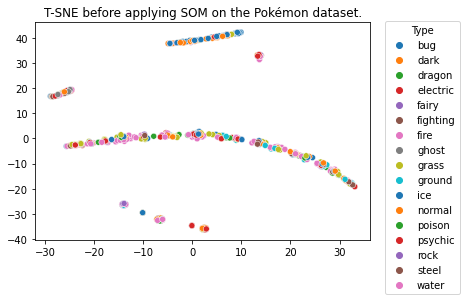

In [68]:
scatter = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df['type1'],palette="tab10")
scatter.legend(bbox_to_anchor= (1.03, 1.03), title="Type")
plt.title("T-SNE before applying SOM on the Pokémon dataset.")
plt.show()

# DBSCAN

In [ ]:
tries = []
for min_samples in range(10,20):
  for eps in range(1, 10, 1):
    model= DBSCAN(eps=eps, min_samples=min_samples,n_jobs = -1)
    labels = model.fit_predict(X)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    tries.append((min_samples,eps,n_clusters_))

In [ ]:
df_tries = pd.DataFrame(tries, columns=['min_samples','eps','cores'])

- The number of core from input tries 

In [ ]:
df_tries['cores'].unique()

array([ 0,  1, 10,  4,  5,  2,  3,  7,  6])

In [ ]:
df_close = df_tries.loc[(df_tries['cores'] < 12) & (df_tries['cores'] > 3), :]

In [105]:
df_close = df_close.sort_values(by=['cores'],ascending=False)

In [ ]:
df_close10 = df_close.iloc[0:10,:]
df_close10 

,min_samples,eps,cores
2,10,3,10
11,11,3,10
20,12,3,7
47,15,3,6
56,16,3,6
29,13,3,6
4,10,5,5
32,13,6,5
38,14,3,5
40,14,5,4


- Plot the epsilon and minpoints values as x-y axes using a 3D figure to show the 10 combinations of 
epsilon and minpoints that brings you closer to the 10 clusters. The z-axis should illustrate the 
number of clusters you obtain when using the corresponding epsilon and minpoints

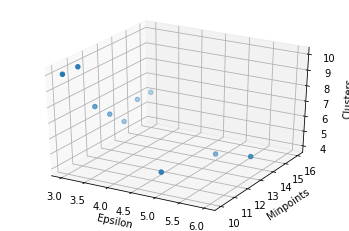

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(df_close10['eps'], df_close10['min_samples'], df_close10['cores'])
ax.set_xlabel('Epsilon')
ax.set_ylabel('Minpoints')
ax.set_zlabel('Clusters')
plt.show()

- After determine the parameters for DBSCAN with 10 clusters, plot DBSCAN clusters.


In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
model= DBSCAN(3, 11,n_jobs = -1)
db = model.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

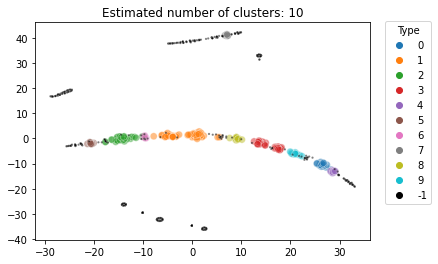

In [104]:
x = X_embedded[labels != -1,0]
y = X_embedded[labels != -1,1]
scatter = sns.scatterplot(x=x, y=y, hue=labels[labels != -1],palette='tab10',s=50, alpha=.5)

x_n = X_embedded[labels == -1,0]
y_n = X_embedded[labels == -1,1]
scatter = sns.scatterplot(x=x_n, y=y_n, hue=labels[labels == -1],palette=dict({-1:'black'}),s=5, alpha=.5)

scatter.legend(bbox_to_anchor= (1.03, 1.03), title="Type")
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Colored points : clusters.
Black points : Noise